# Exploring Feature Maps in CNNs with VGG: A Visual Journey
Convolutional neural networks (CNNs) have revolutionized the field of computer vision, enabling remarkable advancements in tasks such as image classification, object detection, and segmentation. A key aspect of understanding CNNs lies in deciphering how they process and interpret visual information at different levels of abstraction.

In this tutorial notebook, we embark on a visual journey into the inner workings of CNNs, focusing on the VGG architecture. Named after the Visual Geometry Group at the University of Oxford, VGG is renowned for its simplicity and effectiveness, making it a popular choice for various computer vision tasks.

## Importing required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision
from torch import nn
from torchvision import transforms
from torchinfo import summary

## Introduction to VGG
Discover the foundational principles and architecture of the VGG network, a pioneering convolutional neural network renowned for its simplicity and effectiveness in computer vision tasks. Gain insights into its structure and design, setting the stage for exploring feature maps within this iconic model.
![Arch](Images/VGGArch.png)

## Loading Pre-trained VGG Model
Unlock the power of pre-trained deep learning models with `PyTorch` as we delve into seamlessly loading a pre-trained VGG model. Harness the strength of transfer learning to expedite your computer vision projects with ease and efficiency.

In [2]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg11', pretrained=True)

Using cache found in C:\Users\Amir/.cache\torch\hub\pytorch_vision_v0.10.0
D:\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## Model summary
we will look at the model summary using `summary` function from ``torchinfo`` package.

In [3]:
summary(model=model,input_size=(1,3,224,244),col_names=["input_size", "output_size", "num_params", "kernel_size"])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Kernel Shape
VGG                                      [1, 3, 224, 244]          [1, 1000]                 --                        --
├─Sequential: 1-1                        [1, 3, 224, 244]          [1, 512, 7, 7]            --                        --
│    └─Conv2d: 2-1                       [1, 3, 224, 244]          [1, 64, 224, 244]         1,792                     [3, 3]
│    └─ReLU: 2-2                         [1, 64, 224, 244]         [1, 64, 224, 244]         --                        --
│    └─MaxPool2d: 2-3                    [1, 64, 224, 244]         [1, 64, 112, 122]         --                        2
│    └─Conv2d: 2-4                       [1, 64, 112, 122]         [1, 128, 112, 122]        73,856                    [3, 3]
│    └─ReLU: 2-5                         [1, 128, 112, 122]        [1, 128, 112, 122]        --                        --
│    └─

In [4]:
# loading a test image
img = img = Image.open('dog.jpeg')
# define transforms
INPUT_SHAPE = (224,224)
transformers = transforms.Compose(
[
    
    transforms.ToTensor(),    #conver numpy array image into tensor to run on a gpu
    transforms.Resize(INPUT_SHAPE)  #resize image into 224,224
])
# apply transforms
transformed_img = transformers(img)

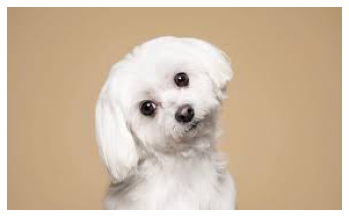

In [5]:
plt.imshow(img)
plt.axis('off')
plt.show()

looking good so far!

## Accessing Intermediate Layers
Uncover the hidden layers of the VGG architecture as we delve into accessing intermediate representations within the network. Gain insights into the hierarchical feature learning process, empowering a deeper understanding of how convolutional neural networks extract and encode information at varying levels of abstraction.

In [6]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

we save from above we have 3 component inside the model:
1. features
2. avgpool
3. classifier 

we are reaching for features

In [7]:
Sequ_layers = model.features

In [8]:
conv_layers = []                            #creating an empty list to add our conv layers to it
for layer in Sequ_layers:                   #Looping thought all layers in features component
    if type(layer) == nn.Conv2d:            #checking for conv layers
        conv_layers.append(layer)           #add this layer to our list

print(f"number of convlutional layers = {len(conv_layers)}")

number of convlutional layers = 8


we will now get output from each of this layer by passing input image to first layer, then the output of the first layer will be the input for the next layer and so on.

In [9]:
results = [conv_layers[0](transformed_img.unsqueeze(0))]   #passing input image to our first layer
for i in range(1,len(conv_layers)):                        #looping through the rest of the layers
    results.append(conv_layers[i](results[-1]))            #passing last layer output to be the next layer input
    
print(f"length of results = {len(results)}")                #this should be equal to number of layers

length of results = 8


## Visualizing Feature Maps
 Explore techniques to unveil the abstract representations learned by the network, illuminating the intricate patterns, textures, and shapes encoded within feature maps. Through visualization, gain profound insights into how CNNs perceive and interpret visual stimuli, unlocking the secrets hidden within their layers.

In [10]:
#let's take a look at the first layer output shape
results[0].shape

torch.Size([1, 64, 224, 224])

we have 64 output kernels so we have a 64 224 by 224  features map for this very first layer.

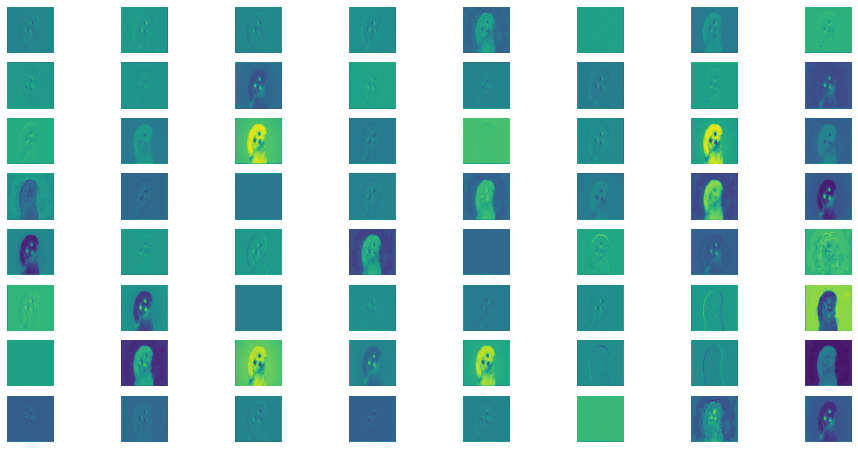

In [11]:
first_layer_features = results[0].squeeze(0)                  # get rid of the first dim, which is the batch size
plt.figure(figsize=(16,8))                                    # creating a figure 

for i,f in enumerate(first_layer_features):                   # looping throught all of these features
    plt.subplot(8,8,i+1)                                      # accessing the ith location in the figure
    plt.imshow(first_layer_features[i].detach().numpy())      # displaying the features map
    plt.axis('off')

plt.savefig('Features map.png')

This is our dog from above! Now you can see how the model represnt your input image through each layer.

If you want to display another layers features map, go ahead, all you have to do now is specifiy the layer.

### Additional part of visualizing weigths
in this section, we will see how to plot learnt weigths from the first layer

In [12]:
weigths = conv_layers[0].weight
print(f"First layer weigths shape = {weigths.shape}")        #it should print (number of output kernel,c,h,w)

First layer weigths shape = torch.Size([64, 3, 3, 3])


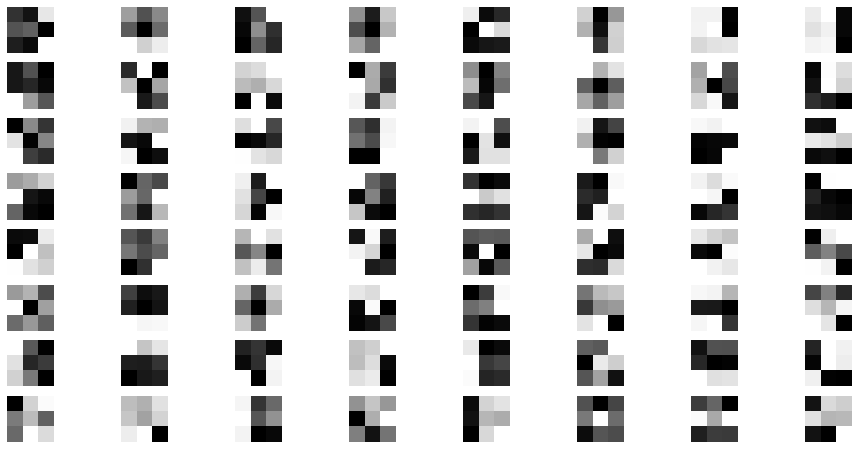

In [13]:
plt.figure(figsize=(16,8))                                       # creating a figure 
for idx,w in enumerate(weigths):                                 # looping through the weights
    plt.subplot(8,8,idx+1)
    weight = np.array(w.detach().numpy()*255,dtype=np.uint8)     # convert tensor back into numpy array and multpile by 255
    plt.imshow(weight[:,:,0],cmap='gray')                        # displaying only the first channel of the filter
    plt.axis('off')
plt.savefig('Weights.png')

you can now visulize any weigths you want in the model, to get a better understange of how the model detect something!

# Author
Amir Tarek 

feel free to contant me any time : amir.tarek11@gmail.com